In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Ï£ºÎ¨∏ Í∞ÄÍ≤© ÌîºÏ≥ê ÏÉùÏÑ±
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' Ïª¨ÎüºÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï£ºÏ§ëÍ≥º Ï£ºÎßêÏùÑ Íµ¨Î∂Ñ
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' Ïª¨Îüº Ïù¥Ïö©ÌïòÏó¨ ÌåêÎß§ Ïõî Ï∂îÏ∂ú
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. Î™®ÏßëÎã®Í≥º ÌëúÎ≥∏ ÏßëÎã®Ïùò TotalPriceÎ•º ÎπÑÍµêÌï¥ Ï£ºÏÑ∏Ïöî.

* Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú 1000Í∞úÏùò ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌïòÏÑ∏Ïöî.
* Ï∂îÏ∂úÎêú ÌëúÎ≥∏Í≥º Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò 'TotalPrice'Ïóê ÎåÄÌï¥ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÎπÑÍµêÌï¥Ï£ºÏÑ∏Ïöî.  
* Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨Î•º ÏÇ¨Ïö©Ìï¥ Î™®ÏßëÎã®Í≥º ÌëúÎ≥∏Ïùò Ï∞®Ïù¥Î•º ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.

In [8]:
# ÏãúÎìú 42ÏóêÏÑú ÎûúÎç§Ï∂îÏ∂ú
np.random.seed(42)
sample_size = 1000
sample_df = df.sample(n=sample_size, random_state=42)

print(f"Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ : {len(df)}")
print(f"ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ : {len(sample_df)}")

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ : 541909
ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ : 1000


In [9]:
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [10]:
sample_df['TotalPrice'].describe()

count    1000.000000
mean       16.832070
std        64.467328
min      -222.750000
25%         3.750000
50%         9.615000
75%        17.700000
max      1790.000000
Name: TotalPrice, dtype: float64

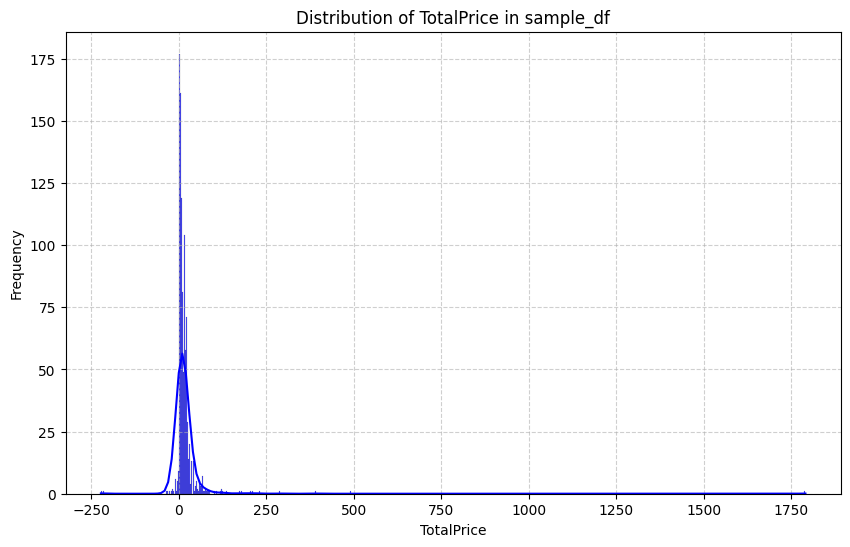

In [11]:
# --- sample_df['TotalPrice'] ÌûàÏä§ÌÜ†Í∑∏Îû® ---

plt.figure(figsize=(10, 6))

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
sns.histplot(
    sample_df['TotalPrice'],
    kde=True,      # Kernel Density Estimate (Î∞ÄÎèÑ Í≥°ÏÑ†)
    color='blue',
    alpha=0.7
)

plt.title('Distribution of TotalPrice in sample_df')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [12]:
# Ï§ëÏã¨Í∑πÌïú Ï†ïÎ¶¨ n=30ÏúºÎ°ú 1000Î≤àÏî© ÌëúÎ≥∏Ï∂îÏ∂ú
np.random.seed(42)
sample_means = []
n_samples = 1000
sample_size_clt = 30

for _ in range(n_samples):
    sample = df['TotalPrice'].sample(n=sample_size_clt, replace=True)
    # ÌëúÎ≥∏ ÌèâÍ∑† Í≥ÑÏÇ∞
    sample_means.append(sample.mean())

sample_means_df = pd.DataFrame({'SampleMean': sample_means})

clt_mean = sample_means_df['SampleMean'].mean()
clt_std = sample_means_df['SampleMean'].std()

print(f" Î™®ÏßëÎã® ÌèâÍ∑† : {df['TotalPrice'].mean():.2f}")
print(f" ÌëúÎ≥∏ ÌèâÍ∑†Îì§Ïùò ÌèâÍ∑†: {clt_mean:.2f}")
print("---")
print(f" Î™®ÏßëÎã® ÌëúÏ§ÄÌé∏Ï∞® : {df['TotalPrice'].std():.2f}")
pop_std = df['TotalPrice'].std()
se = pop_std / np.sqrt(sample_size_clt)
print(f" ÌëúÎ≥∏ ÌèâÍ∑†Îì§Ïùò Ïã§Ï†ú ÌëúÏ§ÄÌé∏Ï∞® (CLT std): {clt_std:.2f}")
print(f" ÌëúÎ≥∏ ÌèâÍ∑†Ïùò Ïù¥Î°†Ï†Å ÌëúÏ§Ä Ïò§Ï∞® (SE): {se:.2f}")

 Î™®ÏßëÎã® ÌèâÍ∑† : 17.99
 ÌëúÎ≥∏ ÌèâÍ∑†Îì§Ïùò ÌèâÍ∑†: 18.15
---
 Î™®ÏßëÎã® ÌëúÏ§ÄÌé∏Ï∞® : 378.81
 ÌëúÎ≥∏ ÌèâÍ∑†Îì§Ïùò Ïã§Ï†ú ÌëúÏ§ÄÌé∏Ï∞® (CLT std): 18.07
 ÌëúÎ≥∏ ÌèâÍ∑†Ïùò Ïù¥Î°†Ï†Å ÌëúÏ§Ä Ïò§Ï∞® (SE): 69.16


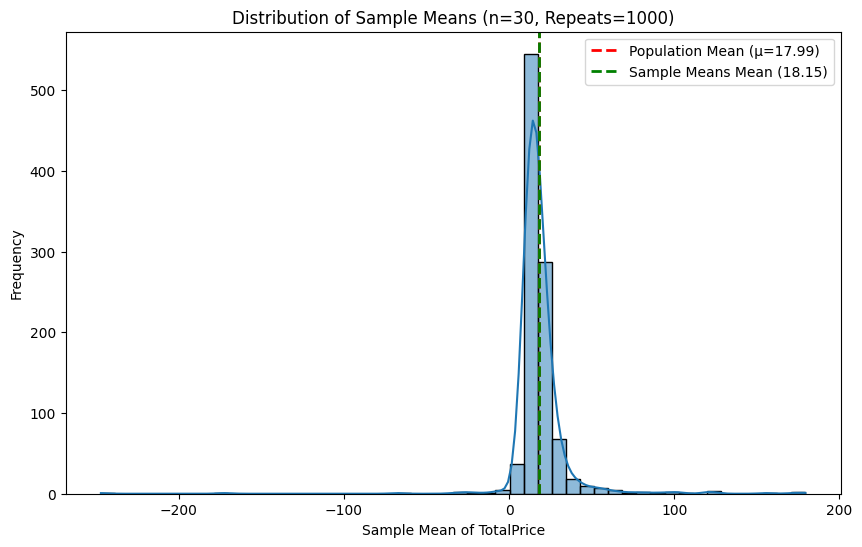

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_df['SampleMean'], kde=True, bins=50)
plt.axvline(df['TotalPrice'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Population Mean (Œº={df["TotalPrice"].mean():.2f})')
plt.axvline(clt_mean, color='green', linestyle='dashed', linewidth=2, label=f'Sample Means Mean ({clt_mean:.2f})')

plt.title(f'Distribution of Sample Means (n={sample_size_clt}, Repeats={n_samples})')
plt.xlabel('Sample Mean of TotalPrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Î™®ÏßëÎã® : Í∑πÎèÑÎ°ú ÎπÑÎåÄÏπ≠(Ïö∞Ï∏°ÏúºÎ°ú Íº¨Î¶¨Í∞Ä ÍπÄ) ÎπÑÏ†ïÍ∑úÏ†Å ÌòïÌÉú

ÌëúÎ≥∏(n=1000) : 0 Í∑ºÏ≤òÏóê ÏßëÏ§ëÎêú Î∂ÑÌè¨

Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨ Ï†ÅÏö© ÌëúÎ≥∏ : Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏ†ë

Î™®ÏßëÎã® Î∂ÑÌè¨Í∞Ä Í∑πÎèÑÎ°ú ÎπÑÏ†ïÍ∑úÏ†ÅÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† 30Í∞úÏî© Ï∂îÏ∂úÌïú ÌëúÎ≥∏ÌèâÍ∑†ÏùÄ Î™®ÌèâÍ∑†Ïóê Îß§Ïö∞ Í∑ºÏ†ëÌïòÎ©∞ Ï†ïÍ∑úÏ†ÅÏù∏ Î∂ÑÌè¨Î•º Î≥¥Ïó¨Ï§ÄÎã§.


## 2. Ï£ºÎ¨∏Ïù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ Îëê Íµ≠Í∞ÄÏùò 'TotalPrice' ÌèâÍ∑†Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Í≤ÄÏ¶ùÌïòÏÑ∏Ïöî.

* 'Country' Î≥ÄÏàòÎ•º Î∞îÌÉïÏúºÎ°ú Ï£ºÎ¨∏Ïù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ Îëê Íµ≠Í∞ÄÎ•º Ï∞æÏúºÏÑ∏Ïöî.
* ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îëê Íµ≠Í∞Ä Í∞Ñ 'TotalPrice' ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïúÏßÄ Í≤ÄÏ¶ùÌïòÏÑ∏Ïöî.  
* t-ÌÜµÍ≥ÑÎüâÍ≥º p-Í∞íÏùÑ Ìï¥ÏÑùÌïòÏó¨ Í≤∞Í≥ºÎ•º ÏÑ§Î™ÖÌïòÍ≥†, 1Ï¢Ö Ïò§Î•òÏôÄ 2Ï¢Ö Ïò§Î•òÏùò Í∞úÎÖêÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.

In [14]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
TotalPrice           0
DayOfWeek            0
InvoiceMonth         0
dtype: int64

In [15]:
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(2)
top_countries

Country
United Kingdom    495478
Germany             9495
Name: count, dtype: int64

In [16]:
# ÎèÖÎ¶ΩÌëúÎ≥∏ tÍ≤ÄÏ†ï
from scipy import stats
from scipy.stats import norm

Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Îëê ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Í∞ôÎã§

ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Îëê ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§

In [17]:
# ÏÉÅÏúÑ Îëê Íµ≠Í∞Ä ÌôïÏù∏
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(2)

country_1 = top_countries.index[0]
country_2 = top_countries.index[1]

group_1 = df[df['Country'] == country_1]['TotalPrice'].dropna()
group_2 = df[df['Country'] == country_2]['TotalPrice'].dropna()

In [18]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏÇ¨ Î®ºÏ†Ä Ïã§Ìñâ
def run_shapiro(data, name):
    if len(data) > 5000:
        data_sample = data.sample(n=5000, random_state=42)
    else:
        data_sample = data

    stat, p = stats.shapiro(data_sample)
    print(f"\n--- Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º ({name}) ---")
    print(f"Shapiro-Wilk ÌÜµÍ≥ÑÎüâ: {stat:.4f}")
    print(f"P-Í∞í: {p:.4f}")

    if p < 0.05:
        print("Í≤∞Î°†: P-Í∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. -> **Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏäµÎãàÎã§.**")
    else:
        print("Í≤∞Î°†: P-Í∞íÏù¥ 0.05Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§. -> Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§.")

run_shapiro(group_1, country_1)
run_shapiro(group_2, country_2)


--- Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º (United Kingdom) ---
Shapiro-Wilk ÌÜµÍ≥ÑÎüâ: 0.1433
P-Í∞í: 0.0000
Í≤∞Î°†: P-Í∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. -> **Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏäµÎãàÎã§.**

--- Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º (Germany) ---
Shapiro-Wilk ÌÜµÍ≥ÑÎüâ: 0.4172
P-Í∞í: 0.0000
Í≤∞Î°†: P-Í∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. -> **Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏäµÎãàÎã§.**


Ï†ïÍ∑úÏÑ±Ïù¥ ÏóÜÏúºÎØÄÎ°ú Welch's t-testÎ•º Ïã§ÌñâÌï©ÎãàÎã§.

t-Í≤ÄÏ†ïÏùò ÌïµÏã¨ Í∞ÄÏ†ïÏùÄ Î™®ÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í≤ÉÏûÖÎãàÎã§.

In [19]:
# 1. Ïù¥ÌÉà Í≥†Í∞ùÎ≥Ñ 2Í∞ú Í∑∏Î£πÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
df_UK = df[df['Country'] == 'United Kingdom']['TotalPrice']
df_Ger = df[df['Country'] == 'Germany']['TotalPrice']

# 2. Í∑∏Î£πÎ≥Ñ MonthlyCharges ÌëúÎ≥∏ÌèâÍ∑† Í≥ÑÏÇ∞
print(f"United Kindom ÏöîÍ∏à ÌèâÍ∑†: ${df_UK.mean():.2f}")
print(f"Germany ÏöîÍ∏à ÌèâÍ∑†: ${df_Ger.mean():.2f}")

# 3. t-Í≤ÄÏ†ï ÏàòÌñâ
t_stat_mc, p_val_mc = stats.ttest_ind(df_UK, df_Ger, equal_var=False)
# stats.ttest_ind(): ÎèÖÎ¶ΩÎêú Îëê ÌëúÎ≥∏Ïùò ÌèâÍ∑† Ï∞®Ïù¥Î•º Í≤ÄÏ†ïÌïòÎäî Ìï®Ïàò
# equal_var=False: Îëê Í∑∏Î£πÏùò Î™®Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§Í≥† Í∞ÄÏ†ï(Îì±Î∂ÑÏÇ∞Ïù¥ ÏïÑÎãàÎã§)ÌïòÎäî Welch's t-test ÏàòÌñâ
# Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÄÏßÄ Ïó¨Î∂ÄÎ•º ÎØ∏Î¶¨ Í≤ÄÏ¶ùÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêòÏñ¥ÏÑú, ÏùºÎ∞òÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©ÎêúÎã§Í≥† Ìï®

print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat_mc:.4f}")
print(f"p-Í∞í: {p_val_mc:.4f}")

United Kindom ÏöîÍ∏à ÌèâÍ∑†: $16.53
Germany ÏöîÍ∏à ÌèâÍ∑†: $23.35
t-ÌÜµÍ≥ÑÎüâ: -10.0464
p-Í∞í: 0.0000


p-Í∞íÏù¥ Ïú†ÏùòÏàòÏ§Ä 0.05Î≥¥Îã§ ÏûëÏùå.

t ÌÜµÍ≥ÑÎüâÏùò Ï†àÎåìÍ∞íÏù¥ ÏûÑÍ≥ÑÍ∞í 1.96Î≥¥Îã§ Îß§Ïö∞ ÌÅ¨Îã§.
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å.
ÎèÖÏùº Í≥†Í∞ù ÌèâÍ∑† Ï£ºÎ¨∏Í∏àÏï°Ïù¥ ÏòÅÍµ≠ Í≥†Í∞ùÎ≥¥Îã§ Ïú†ÏùòÌïòÍ≤å ÎÜíÎã§.

1Ï¢Ö Ïò§Î•ò : Ïã§Ï†úÎ°úÎäî Îëê Íµ≠Í∞ÄÏùò ÌèâÍ∑†Ïóê Ï∞®Ïù¥Í∞Ä ÏóÜÎäîÎç∞ **Ï∞®Ïù¥Í∞Ä ÏûàÎã§**Í≥† ÏûòÎ™ª Í≤∞Î°† ÎÇ¥Î¶º.
Ïù¥ Ïò§Î•òÎ•º ÎÇòÌÉÄÎÇº ÌôïÎ•†ÏùÄ 0.05Ïù¥Ìïò. pÍ∞íÏù¥ 0.0000ÏúºÎ°ú Îß§Ïö∞ ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïóê ÎÇÆÎã§.

2Ï¢Ö Ïò§Î•ò : Ïã§Ï†úÎ°úÎäî Îëê Íµ≠Í∞Ä ÌèâÍ∑†Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÎç∞ **Ï∞®Ïù¥Í∞Ä ÏóÜÎã§**Í≥† ÏûòÎ™ª Í≤∞Î°† ÎÇ¥Î¶¨Îäî Ïò§Î•ò
Ïù¥ Ïò§Î•òÎäî ÏúÑ Í≤ÄÏ¶ùÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Î≤îÌïòÏßÄ ÏïäÏùå.

## 3. Ï£ºÏ§ë, Ï£ºÎßêÏóê Îî∞ÎùºÏÑú Î∞úÏÉùÌïòÎäî UnitPriceÏùò Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏßÄÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

* Ï£ºÏ§ëÏùò 'UnitPrice'ÏôÄ Ï£ºÎßêÏùò 'UnitPrice'Ïùò Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏã¨Í≤ΩÌñ•Ïπò(ÌèâÍ∑†, Ï§ëÍ∞ÑÍ∞í), Î≥ÄÏÇ∞ÏÑ±(ÌëúÏ§ÄÌé∏Ï∞®, Î∂ÑÏÇ∞), Î∂ÑÏúÑÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.  
* ÏÉÅÏûêÏàòÏóºÍ∑∏Î¶ºÍ≥º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î†§ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Ïóê ÎåÄÌï¥ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.

In [20]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
...                    ...        ...         ...             ...         ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85   

        DayOfWeek  InvoiceMonth  
0               2            12  
1               2            12  
2               2            12  
3               2            12  
4               2            12  
...           ...           ...  
541904          4            12  
541905          4            12  
541906          4            12  
541907          4            12  
541908          4            12  

[541909 rows x 11 columns]

In [21]:
# Ï£ºÏ§ëÍ≥º Ï£ºÎßê Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# DayOfWeek: 0=Ïõî, 1=Ìôî, 2=Ïàò, 3=Î™©, 4=Í∏à, 5=ÌÜ†, 6=Ïùº
weekday_prices = df[df['DayOfWeek'].isin([0, 1, 2, 3, 4])]['UnitPrice'].dropna()
weekend_prices = df[df['DayOfWeek'].isin([5, 6])]['UnitPrice'].dropna()

print(f"Ï£ºÏ§ë Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: {len(weekday_prices)}")
print(f"Ï£ºÎßê Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: {len(weekend_prices)}")

Ï£ºÏ§ë Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: 477534
Ï£ºÎßê Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: 64375


In [22]:
# ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ ÏΩîÎìú
stats_df = pd.DataFrame({
    'Weekday': [weekday_prices.mean(), weekday_prices.median(), weekday_prices.std(), weekday_prices.var(), weekday_prices.quantile(0.25), weekday_prices.quantile(0.75), weekday_prices.max()],
    'Weekend': [weekend_prices.mean(), weekend_prices.median(), weekend_prices.std(), weekend_prices.var(), weekend_prices.quantile(0.25), weekend_prices.quantile(0.75), weekend_prices.max()]
}, index=['Mean', 'Median', 'Std. Dev', 'Variance', '25th Quantile', '75th Quantile', 'Max'])
print(stats_df)

                    Weekday      Weekend
Mean               4.843425     2.887824
Median             2.100000     1.850000
Std. Dev         103.032058     7.959497
Variance       10615.604927    63.353599
25th Quantile      1.250000     1.250000
75th Quantile      4.130000     3.750000
Max            38970.000000  1236.750000


/tmp/ipython-input-1060557544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'])


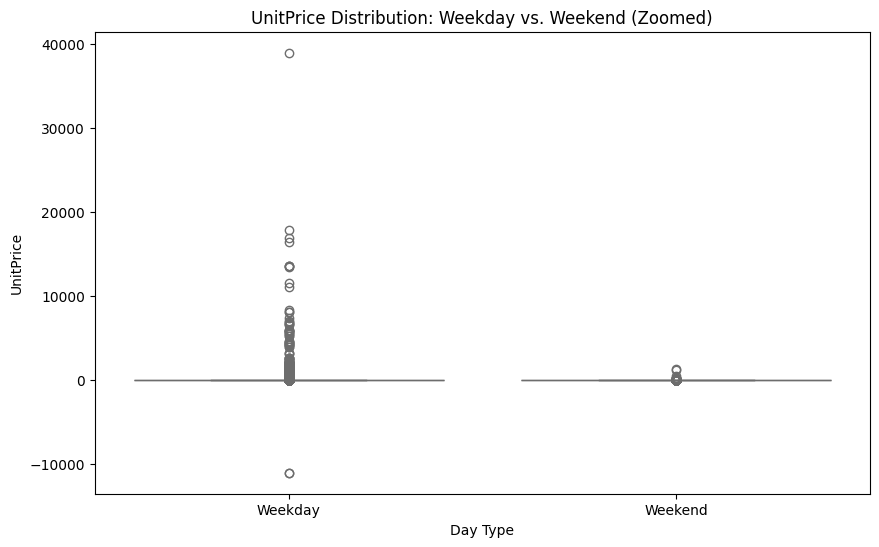

In [23]:
# Îëê Í∑∏Î£πÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò DataFrameÏúºÎ°ú Ìï©ÏπòÍ∏∞
plot_df = pd.DataFrame({
    'UnitPrice': pd.concat([weekday_prices, weekend_prices]),
    'DayType': ['Weekday'] * len(weekday_prices) + ['Weekend'] * len(weekend_prices)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'])


plt.title('UnitPrice Distribution: Weekday vs. Weekend (Zoomed)')
plt.xlabel('Day Type')
plt.ylabel('UnitPrice')
plt.show()

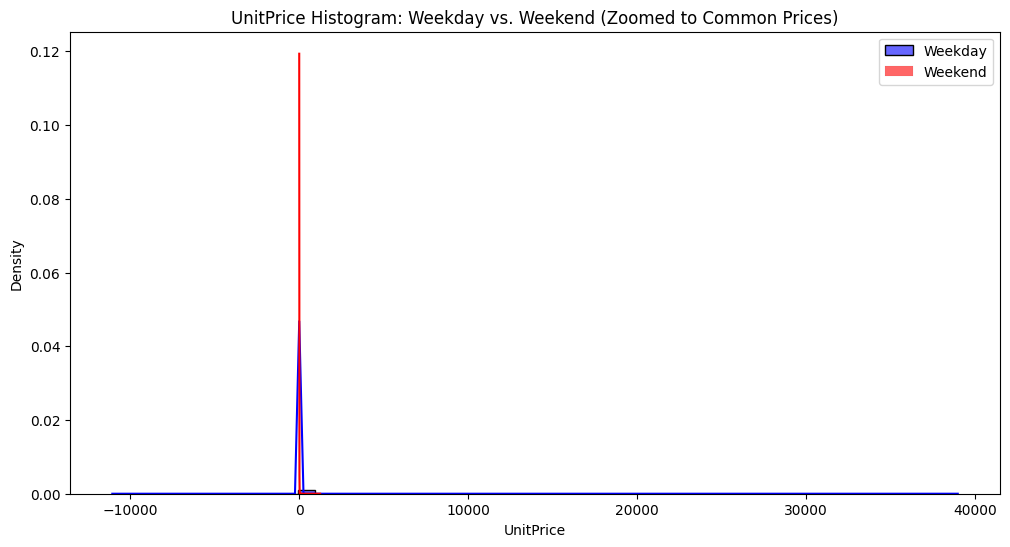

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(weekday_prices, bins=50, kde=True, color='blue', label='Weekday', alpha=0.6, stat='density')
sns.histplot(weekend_prices, bins=50, kde=True, color='red', label='Weekend', alpha=0.6, stat='density')

plt.title('UnitPrice Histogram: Weekday vs. Weekend (Zoomed to Common Prices)')
plt.xlabel('UnitPrice')
plt.ylabel('Density')
plt.legend()
plt.show()

## 4. ÏÉÅÌíàÏùò Îã®Í∞ÄÏôÄ ÌåêÎß§ Íµ≠Í∞Ä, ÌåêÎß§ ÎÇ†ÏßúÏùÑ Ïù¥Ïö©Ìï¥ ÌåêÎß§ ÏàòÎüâÏùÑ ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÎßåÎìúÏÑ∏Ïöî.
* ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÎ¶¨ÌïòÍ≥† Í≤∞Ï∏°ÏπòÏôÄ Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Ï£ºÏÑ∏Ïöî.  
* Î≥ÄÏàòÎ•º Îã§ÏùåÍ≥º Í∞ôÏù¥ ÏÑ§Ï†ïÌïòÏó¨ Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïòÏÑ∏Ïöî.
    * Ï¢ÖÏÜçÎ≥ÄÏàò: ÌåêÎß§ ÏàòÎüâ(`Quantity`)
    * ÎèÖÎ¶ΩÎ≥ÄÏàò: ÏÉÅÌíà Îã®Í∞Ä(`UnitPrice`), ÌåêÎß§ Íµ≠Í∞Ä(`Country`), ÌåêÎß§ ÏöîÏùº(`DayOfWeek`), ÌåêÎß§ Ïõî( `InvoiceMonth`)   
* ÌöåÍ∑ÄÍ≥ÑÏàòÏôÄ Í≤∞Ï†ïÍ≥ÑÏàòÎ•º ÌôúÏö©ÌïòÏó¨ ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï¥Ï£ºÏÑ∏Ïöî.

In [25]:
# Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Ï†úÍ±∞
# ÌåêÎß§ÏàòÎüâ Qiantity 0 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ = Î∞òÌíà / Ï∑®ÏÜå Ï†úÍ±∞
# Îã®Í∞Ä UnitPrice 0 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ = Î¨¥Î£åÏÉÅÌíà / Ïò§Î•ò Ï†úÍ±∞
import statsmodels.api as sm
df_model = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# Quantity (ÌåêÎß§ ÏàòÎüâ)ÏôÄ UnitPrice (Îã®Í∞Ä)Í∞Ä 0 Ïù¥ÌïòÏù∏ ÎπÑÏ†ïÏÉÅ Í±∞Îûò Ï†úÍ±∞
# Quantity: Î∞òÌíà/Ï∑®ÏÜå Ï†úÍ±∞, UnitPrice: Î¨¥Î£å ÏÉÅÌíà/Ïò§Î•ò Ï†úÍ±∞
df_model = df_model[(df_model['Quantity'] > 0) & (df_model['UnitPrice'] > 0)].dropna()

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï†ïÎ¶¨ Î∞è Í∑∏Î£πÌïë

# 'Country' Ï≤òÎ¶¨: Ï£ºÎ¨∏ Í±¥Ïàò ÏÉÅÏúÑ 5Í∞úÍµ≠Îßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî 'Other'Î°ú Í∑∏Î£πÌïë
top_5_countries = df_model['Country'].value_counts().nlargest(5).index
df_model['Country_Processed'] = df_model['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)

# ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ± (One-Hot Encoding)
# DayOfWeekÏôÄ InvoiceMonthÎ•º Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
df_model['DayOfWeek'] = df_model['DayOfWeek'].astype('category')
df_model['InvoiceMonth'] = df_model['InvoiceMonth'].astype('category')

# drop_first=TrueÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∏∞Ï§Ä Í∑∏Î£π(Reference Group) ÏÑ§Ï†ï Î∞è Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄ
# Í∏∞Ï§Ä Í∑∏Î£π: Country=United Kingdom, DayOfWeek=0 (ÏõîÏöîÏùº), InvoiceMonth=1 (1Ïõî)
df_dummies = pd.get_dummies(
    df_model[['Country_Processed', 'DayOfWeek', 'InvoiceMonth']],
    drop_first=True
)

# Convert boolean columns to integers
df_dummies = df_dummies.astype(int)

# ÏµúÏ¢Ö Î™®Îç∏ÎßÅ Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
df_final = pd.concat([df_model[['Quantity', 'UnitPrice']], df_dummies], axis=1)

In [26]:
#  Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù Ïã§Ìñâ ---

# Ï¢ÖÏÜç Î≥ÄÏàò (Y): Quantity (ÌåêÎß§ ÏàòÎüâ)
Y = df_final['Quantity']

# ÎèÖÎ¶Ω Î≥ÄÏàò (X): UnitPriceÏôÄ ÏÉùÏÑ±Îêú ÎçîÎØ∏ Î≥ÄÏàòÎì§
X = df_final.drop('Quantity', axis=1)

# Ï†àÌé∏ (Intercept) Ï∂îÍ∞Ä: ÏÉÅÏàòÌï≠ÏùÑ Î™®Îç∏Ïóê Ï∂îÍ∞Ä
X = sm.add_constant(X)

# OLS (Ordinary Least Squares) Î™®Îç∏ Ï†ÅÌï©
model = sm.OLS(Y, X).fit()


In [27]:
# ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù Î∞è Ï∂úÎ†• ---

print("\n" + "="*50)
print("### üìä Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º (OLS) ###")
print("="*50)

# Ï£ºÏöî ÌÜµÍ≥ÑÎüâ Ï∂úÎ†•
print(f"Ï¢ÖÏÜç Î≥ÄÏàò: Quantity")
print(f"Í¥ÄÏ∏°Ïπò Ïàò (N): {model.nobs:.0f}")
print("-" * 50)
print(f"Í≤∞Ï†ï Í≥ÑÏàò (R-squared): {model.rsquared:.4f}")
print(f"Ï°∞Ï†ïÎêú R-squared: {model.rsquared_adj:.4f}")
print(f"F-ÌÜµÍ≥ÑÎüâ P-Í∞í: {model.f_pvalue:.4f} (Î™®Îç∏Ïùò Ïú†ÏùòÏÑ±)")
print("=" * 50)
print("### üìù ÌöåÍ∑Ä Í≥ÑÏàò (Coefficients) Î∞è Ïú†ÏùòÏÑ± ###")
print("-" * 50)
print(model.summary().tables[1]) # Í≥ÑÏàò ÌÖåÏù¥Î∏î Ï∂úÎ†•

# Í≤∞Í≥º Ìï¥ÏÑù ÏöîÏïΩ ---

# UnitPrice Í≥ÑÏàò Ï∂îÏ∂ú
unit_price_coef = model.params['UnitPrice']
unit_price_p = model.pvalues['UnitPrice']

print("\n" + "="*50)
print("### üîë ÏµúÏ¢Ö Í≤∞Í≥º Ìï¥ÏÑù ÏöîÏïΩ ###")
print("-" * 50)
print(f"1. **Î™®Îç∏ ÏÑ§Î™ÖÎ†• (R-squared):** {model.rsquared:.4f}")
print(f"   -> Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•ÏùÄ {model.rsquared:.2f}Ïù¥ÎØÄÎ°ú, ÌåêÎß§ ÏàòÎüâÏùò Î≥ÄÎèôÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ÏóêÎäî Î∂ÄÏ°±Ìï† Ïàò ÏûàÏäµÎãàÎã§.")

print(f"2. **UnitPrice ÏòÅÌñ•:** Í≥ÑÏàò = {unit_price_coef:.4f}, P-Í∞í = {unit_price_p:.4f}")
if unit_price_p < 0.05:
    print(f"   -> **ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†Ïùò**Ìï©ÎãàÎã§. Îã®Í∞ÄÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† Îïå ÌåêÎß§ ÏàòÎüâÏùÄ {unit_price_coef:.4f}ÎßåÌÅº Í∞êÏÜåÌï©ÎãàÎã§.")
else:
    print(f"   -> ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

print("\n3. **Î≤îÏ£ºÌòï Î≥ÄÏàò Ìï¥ÏÑù:**")
print(f"   -> Î™®Îì† Í≥ÑÏàòÎäî Ìï¥Îãπ Í∑∏Î£πÏù¥ Í∏∞Ï§Ä Í∑∏Î£π(UK, ÏõîÏöîÏùº, 1Ïõî) ÎåÄÎπÑ QuantityÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.")
print(f"   -> P-Í∞íÏù¥ 0.05 ÎØ∏ÎßåÏù∏ Í≥ÑÏàòÎì§Îßå ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.")
print("-" * 50)


### üìä Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º (OLS) ###
Ï¢ÖÏÜç Î≥ÄÏàò: Quantity
Í¥ÄÏ∏°Ïπò Ïàò (N): 530104
--------------------------------------------------
Í≤∞Ï†ï Í≥ÑÏàò (R-squared): 0.0007
Ï°∞Ï†ïÎêú R-squared: 0.0007
F-ÌÜµÍ≥ÑÎüâ P-Í∞í: 0.0000 (Î™®Îç∏Ïùò Ïú†ÏùòÏÑ±)
### üìù ÌöåÍ∑Ä Í≥ÑÏàò (Coefficients) Î∞è Ïú†ÏùòÏÑ± ###
--------------------------------------------------
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               18.2896      1.992      9.180      0.000      14.385      22.195
UnitPrice                           -0.0172      0.006     -2.898      0.004      -0.029      -0.006
Country_Processed_France            -5.3507      2.438     -2.194      0.028     -10.130      -0.572
Country_Processed_Germany           -5.4961      2.397     -2.293      0.022     -10.194      -0.798
Country_Processed_Oth

Îã®Í∞Ä : Îã®Í∞ÄÍ∞Ä Ïò¨ÎùºÍ∞ÄÎ©¥ ÌåêÎß§ÏàòÎüâ Ïú†ÏùòÌïòÍ≤å Í∞êÏÜå

ÏöîÏùº : ÏõîÏöîÏùºÏóê ÎπÑÌï¥ Ìôî, Ïàò, Î™©ÏöîÏùºÏóê ÌåêÎß§ÏàòÎüâÏù¥ ÎßéÏùå

Íµ≠Í∞Ä : Ï£ºÏöîÍµ≠Í∞ÄÍ∞Ä Í∏∞Ï°¥Í∑∏Î£π ÎåÄÎπÑ ÌåêÎß§ÏàòÎüâÏù¥ Ï†ÅÏùå. OtherÍ∑∏Î£πÏóê ÌåêÎß§ÏàòÎüâÏù¥ Í∞ÄÏû• ÎßéÏùå

Ïõî : 11ÏõîÏùÄ 1ÏõîÍ∏∞Ï§Ä Ïú†ÏùòÌïòÍ≤å Ï†ÅÏùå

Í≤∞Ï†ïÍ≥ÑÏàò R^2 = 0.0007 > ÎèÖÎ¶Ω Î≥ÄÏàòÎì§Ïù¥ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÏïΩ 0.07%Î•º ÏÑ§Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ§Î™ÖÎ†•Ïù¥ Í∑πÌûà ÎÇÆÏùå

Ï°∞Ï†ïÎêú R^2 Î≥ÄÏàò Í∞úÏàòÎ•º Î∞òÏòÅÌï¥ÎèÑ ÏÑ§Î™ÖÎ†•ÏùÄ ÎèôÏùºÌïòÍ≤å ÎÇÆÏùå

F-ÌÜµÍ≥ÑÎüâ P-Í∞í : Î™®Îç∏ Ï†ÑÏ≤¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄÎßå R^2Ïùò Í∞íÏù¥ ÎÑàÎ¨¥ ÎÇÆÏïÑÏÑú Ïã§Ï†ú ÏòàÏ∏°Ïóê ÌôúÏö©ÌïòÍ∏∞ÏóêÎäî Î∂ÄÏ†ÅÏ†àÌïòÎã§.

ÌöåÍ∑Ä Í≥ÑÏàò(coef)Îäî UnitPriceÏóêÏÑú -0.0172, P-ValueÎäî 0.004Ïù¥ÎØÄÎ°ú ÏÉÅÌíà Îã®Í∞ÄÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† Îïå, ÌåêÎß§ ÏàòÎüâÏùÄ ÌèâÍ∑† 0.0172ÎßåÌÅº Ïú†ÏùòÎØ∏ÌïòÍ≤å Í∞êÏÜåÌïòÍ≥† ÏûàÏùå.

Country_UK... Îì±Ïùò coefÏùò Í∞íÏùÄ -8.8565Ïù¥ÎØÄÎ°ú Í∏∞Ï§Ä Íµ≠Í∞ÄÎåÄÎπÑ 8.86Í∞ú Ï†ÅÏùå.
Contry_Other ÏùÄ 11Í∞úÏ†ïÎèÑ ÎÜíÎã§.
DayOfWeek_3(Î™©ÏöîÏùº)ÏùÄ 2.2436ÏúºÎ°ú ÏõîÏöîÏùºÎåÄÎπÑ 2.24Í∞ú ÎßéÏùå.
InvoiceMonth_11 11ÏõîÏùò ÌåêÎß§ÏàòÎüâÏù¥ 1ÏõîÎåÄÎπÑ 2.01Í∞ú Ï†ÅÏùå.

Í≤∞Î°† : Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•ÏùÄ Îß§Ïö∞Îß§Ïö∞Îß§Ïö∞ ÎÇÆÏßÄÎßå, Í∞Å Í∞úÎ≥Ñ Î≥ÄÏàòÎì§Ïùò ÏòÅÌñ•Î†•ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.

## 5. ÏÉÅÌíà Ï†ïÎ≥¥ÏôÄ Í±∞Îûò Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Ìï¥Îãπ Í±∞ÎûòÍ∞Ä Î∞òÌíàÎê† Í∞ÄÎä•ÏÑ±ÏùÑ ÏòàÏ∏°ÌïòÎäî Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÎßåÎìúÏÑ∏Ïöî.
* ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÎ¶¨ÌïòÍ≥† Í≤∞Ï∏°ÏπòÏôÄ Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Ï£ºÏÑ∏Ïöî.  
* `Quantity` ÌîºÏ≥êÎ•º ÌôúÏö©Ìï¥ `IsReturn` ÌîºÏ≥êÎ•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.
* Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Ï†ÅÏ†àÌïú ÌîºÏ≥êÎ•º ÏÑ†Ï†ïÌïòÏÑ∏Ïöî.
* Î™®Îç∏ ÌïôÏäµÍ≥º Í≤ÄÏ¶ùÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ trainÏÖãÍ≥º testÏÖãÏúºÎ°ú ÎÇòÎàÑÏÑ∏Ïöî.
* `IsReturn`ÏùÑ ÏòàÏ∏°ÌïòÎäî Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÏÑ∏Ïöî.
* ÌòºÎèôÌñâÎ†¨, Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score Îì± Îã§ÏñëÌïú ÌèâÍ∞ÄÏßÄÌëúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.
* Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Îçî ÎÜíÏùº Ïàò ÏûàÎäî Î∞©ÏïàÏóê ÎåÄÌï¥ÏÑú Í≥†ÎØºÌï¥Î≥¥ÏÑ∏Ïöî.

In [28]:
# 'InvoiceNo'Í∞Ä 'C'Î°ú ÏãúÏûëÌïòÎ©¥ Î∞òÌíà(Ï∑®ÏÜå)ÏúºÎ°ú Í∞ÑÏ£º (Îçî Ï†ïÌôïÌïú IsReturn Ï†ïÏùò)
# QuantityÍ∞Ä ÏùåÏàòÏù∏ Í≤ΩÏö∞Îäî Î∞òÌíàÏúºÎ°ú Í∞ÑÏ£º

# 1. Îç∞Ïù¥ÌÑ∞ ÌÅ¥Î¶¨Îãù Î∞è Î≥µÏÇ¨
df_logi = df.copy()

# 2. IsReturn ÌîºÏ≤ò ÏÉùÏÑ±
# QuantityÍ∞Ä 0Î≥¥Îã§ ÏûëÏúºÎ©¥ Î∞òÌíà(IsReturn=1), ÏïÑÎãàÎ©¥ Ï†ïÏÉÅ Í±∞Îûò(IsReturn=0)Î°ú Ï†ïÏùò
# Ï£ºÏùò: InvoiceNoÍ∞Ä 'C'Î°ú ÏãúÏûëÌïòÏßÄ ÏïäÎçîÎùºÎèÑ QuantityÍ∞Ä ÏùåÏàòÏù¥Î©¥ Î∞òÌíàÏúºÎ°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.
df_logi['IsReturn'] = (df_logi['Quantity'] < 0).astype(int)

# 3. Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ QuantityÎ•º ÏñëÏàòÎ°ú ÌÜµÏùº (Î∞òÌíà Ïó¨Î∂ÄÎäî IsReturnÏù¥ Îã¥Îãπ)
df_logi['Quantity'] = df_logi['Quantity'].abs()

# 4. Ïù¥ÏÉÅÏπò/Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# UnitPriceÍ∞Ä 0 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ Ï†úÍ±∞ (Î¨¥Î£å ÏÉÅÌíà/Ïò§Î•ò)
df_logi = df_logi[df_logi['UnitPrice'] > 0].dropna()

# 5. Ï¢ÖÏÜçÎ≥ÄÏàò (Y): IsReturn, ÎèÖÎ¶ΩÎ≥ÄÏàò (X) ÌõÑÎ≥¥
# DayOfWeek, InvoiceMonthÎäî Ïù¥ÎØ∏ ÏïûÏÑ† Í≥ºÏ†ïÏóêÏÑú ÏÉùÏÑ±ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ï
df_logi = df_logi[['IsReturn', 'UnitPrice', 'Quantity', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

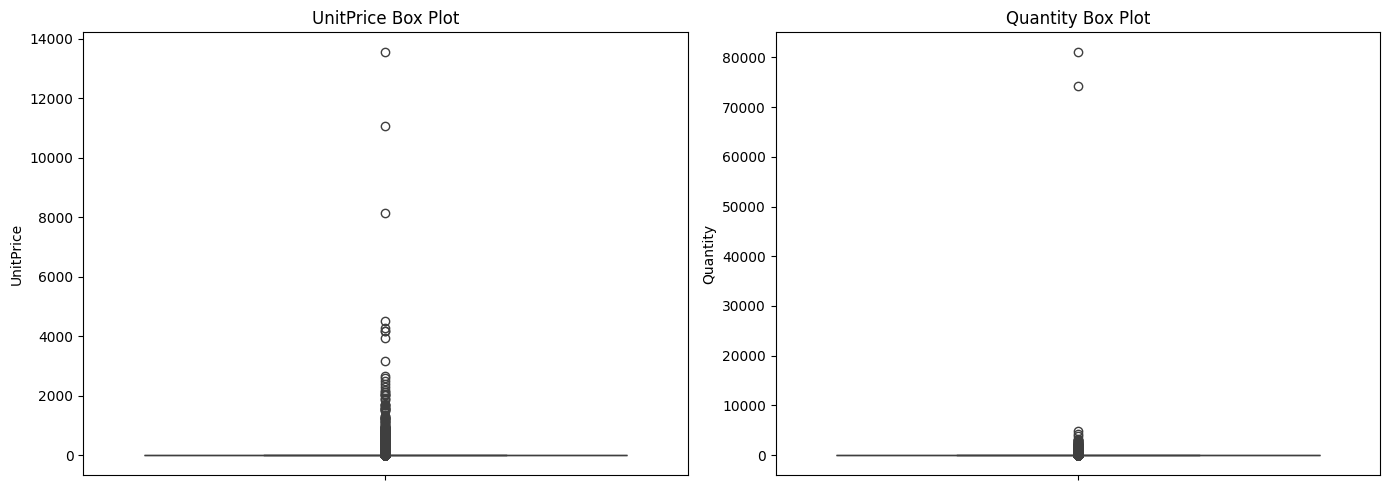


--- UnitPrice IQR Ïù¥ÏÉÅÏπò Î∂ÑÏÑù ---
Q1 (25%): 1.25
Q3 (75%): 4.13
IQR: 2.88
ÌïòÌïú Í≤ΩÍ≥Ñ: -3.07
ÏÉÅÌïú Í≤ΩÍ≥Ñ: 8.45
Ïù¥ÏÉÅÏπò Í∞úÏàò: 37999Í∞ú
Ïù¥ÏÉÅÏπò ÎπÑÏú®: 7.17%
ÏÉÅÏúÑ 5Í∞ú Ïù¥ÏÉÅÏπò Í∞í:
15017     13541.33
299982    11062.06
173382     8142.75
297723     4505.17
268028     4287.63
Name: UnitPrice, dtype: float64

--- Quantity IQR Ïù¥ÏÉÅÏπò Î∂ÑÏÑù ---
Q1 (25%): 1.00
Q3 (75%): 10.00
IQR: 9.00
ÌïòÌïú Í≤ΩÍ≥Ñ: -12.50
ÏÉÅÌïú Í≤ΩÍ≥Ñ: 23.50
Ïù¥ÏÉÅÏπò Í∞úÏàò: 56363Í∞ú
Ïù¥ÏÉÅÏπò ÎπÑÏú®: 10.63%
ÏÉÅÏúÑ 5Í∞ú Ïù¥ÏÉÅÏπò Í∞í:
540421    80995
61619     74215
421632     4800
206121     4300
97432      3906
Name: Quantity, dtype: int64


In [29]:
# --- 1. ÏãúÍ∞ÅÏ†Å ÌôïÏù∏ (Box Plot) ---

plt.figure(figsize=(14, 5))

#  UnitPrice Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(y=df_model['UnitPrice'])
plt.title('UnitPrice Box Plot')
plt.ylabel('UnitPrice')

#  Quantity Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_model['Quantity'])
plt.title('Quantity Box Plot')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

# --- ÌÜµÍ≥ÑÏ†Å ÌôïÏù∏ (IQR Í∏∞Ï§Ä Í≥ÑÏÇ∞) ---

def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    print(f"\n--- {series.name} IQR Ïù¥ÏÉÅÏπò Î∂ÑÏÑù ---")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"ÌïòÌïú Í≤ΩÍ≥Ñ: {lower_bound:.2f}")
    print(f"ÏÉÅÌïú Í≤ΩÍ≥Ñ: {upper_bound:.2f}")
    print(f"Ïù¥ÏÉÅÏπò Í∞úÏàò: {len(outliers)}Í∞ú")
    print(f"Ïù¥ÏÉÅÏπò ÎπÑÏú®: {(len(outliers) / len(series) * 100):.2f}%")

    # ÏÉÅÏúÑ 5Í∞ú Ïù¥ÏÉÅÏπò Í∞í Ï∂úÎ†•
    if len(outliers) > 0:
        print(f"ÏÉÅÏúÑ 5Í∞ú Ïù¥ÏÉÅÏπò Í∞í:\n{outliers.nlargest(5)}")

    return lower_bound, upper_bound

# UnitPrice Ïù¥ÏÉÅÏπò ÌôïÏù∏
lb_price, ub_price = identify_outliers_iqr(df_model['UnitPrice'])

# Quantity Ïù¥ÏÉÅÏπò ÌôïÏù∏
lb_qty, ub_qty = identify_outliers_iqr(df_model['Quantity'])

Ïù¥ÏÉÅÏπòÏùò ÎπÑÏú®Ïù¥ ÎÑàÎ¨¥ ÎßéÏúºÎØÄÎ°ú Ï†úÍ±∞ÌïòÏßÄ ÏïäÍ≥† ÏßÑÌñâ.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# 1. Î≤îÏ£ºÌòï Î≥ÄÏàò ÎçîÎØ∏Ìôî (Country, InvoiceMonth)
# ÏÉÅÏúÑ 5Í∞úÍµ≠Îßå Ïú†ÏßÄÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî 'Other'Î°ú Î¨∂Îäî Ï≤òÎ¶¨ Ï†ÅÏö© (ÏïûÏÑ† ÌöåÍ∑Ä Î™®Îç∏Í≥º ÎèôÏùº)
top_5_countries = df_logi['Country'].value_counts().nlargest(5).index
df_logi['Country_Processed'] = df_logi['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)

# DayOfWeek, InvoiceMonthÎäî Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôò
df_logi['DayOfWeek'] = df_logi['DayOfWeek'].astype('category')
df_logi['InvoiceMonth'] = df_logi['InvoiceMonth'].astype('category')


# ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ± (drop_first=TrueÎ°ú Í∏∞Ï§Ä Í∑∏Î£π ÏÑ§Ï†ï)
X_dummies = pd.get_dummies(
    df_logi[['Country_Processed', 'InvoiceMonth']],
    drop_first=True
)

# ÎèÖÎ¶ΩÎ≥ÄÏàò X Íµ¨ÏÑ±: UnitPrice, Quantity (Ïó∞ÏÜçÌòï) + ÎçîÎØ∏ Î≥ÄÏàò
X = pd.concat([df_logi[['UnitPrice', 'Quantity']], X_dummies], axis=1)

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X, prepend=False)
Y = df_logi['IsReturn']

# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (Train: 70%, Test: 30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y # stratify=YÎ•º ÌÜµÌï¥ Î∞òÌíà ÎπÑÏú® Ïú†ÏßÄ
)

# 3. Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌëúÏ§ÄÌôî (ÏÑ†ÌÉù ÏÇ¨Ìï≠Ïù¥ÏßÄÎßå Î™®Îç∏ ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Ï†ÅÏö©)
scaler = StandardScaler()
X_train[['UnitPrice', 'Quantity']] = scaler.fit_transform(X_train[['UnitPrice', 'Quantity']])
X_test[['UnitPrice', 'Quantity']] = scaler.transform(X_test[['UnitPrice', 'Quantity']])

# Convert boolean columns to integers after splitting and scaling
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [31]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit(disp=0) # disp=0: ÌïôÏäµ Í≥ºÏ†ï Ï∂úÎ†• ÏÉùÎûµ

print("="*60)
print("### Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º (Logit) ###")
print("="*60)
print(result.summary().tables[1]) # Í≥ÑÏàò ÌÖåÏù¥Î∏î Ï∂úÎ†•

# ÏòàÏ∏° ÌôïÎ•†ÏùÑ Î∞îÌÉïÏúºÎ°ú ÌÅ¥ÎûòÏä§ ÏòàÏ∏° (ÏûÑÍ≥ÑÍ∞í 0.5)
Y_pred_proba = result.predict(X_test)
Y_pred = (Y_pred_proba >= 0.5).astype(int)

### Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º (Logit) ###
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
UnitPrice                            0.0678      0.009      7.604      0.000       0.050       0.085
Quantity                             0.0111      0.004      2.831      0.005       0.003       0.019
Country_Processed_France            -0.8313      0.126     -6.579      0.000      -1.079      -0.584
Country_Processed_Germany            0.1663      0.095      1.752      0.080      -0.020       0.352
Country_Processed_Other             -0.2757      0.092     -2.998      0.003      -0.456      -0.095
Country_Processed_Spain             -0.7167      0.189     -3.800      0.000      -1.086      -0.347
Country_Processed_United Kingdom    -0.5905      0.075     -7.846      0.000      -0.738      -0.443
InvoiceMonth_2                      -0.33

In [32]:
# ÌòºÎèô ÌñâÎ†¨
cm = confusion_matrix(Y_test, Y_pred)

print("\n" + "="*50)
print("### 1. ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix) ###")
print("-" * 50)
print(f"TN: {cm[0, 0]}, FP: {cm[0, 1]}")
print(f"FN: {cm[1, 0]}, TP: {cm[1, 1]}")
print("\n" + str(cm))


### 1. ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix) ###
--------------------------------------------------
TN: 119359, FP: 6
FN: 2662, TP: 10

[[119359      6]
 [  2662     10]]


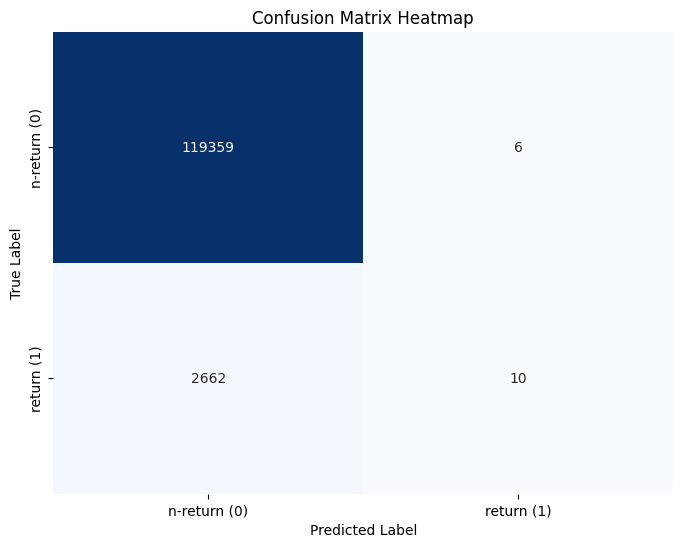

In [33]:
class_names = ['n-return (0)', 'return (1)']

# --- ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:
# Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
report = classification_report(Y_test, Y_pred, zero_division=0)
print("\n" + "="*50)
print("### 2. Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report) ###")
print("-" * 50)
print(report)

# Ï£ºÏöî ÏßÄÌëú Ï∂îÏ∂ú
precision_return = precision_score(Y_test, Y_pred, pos_label=1, zero_division=0)
recall_return = recall_score(Y_test, Y_pred, pos_label=1, zero_division=0)
f1_return = f1_score(Y_test, Y_pred, pos_label=1, zero_division=0)

print(f" Î∞òÌíà Ï†ïÎ∞ÄÎèÑ (Precision): {precision_return:.4f} (ÏòàÏ∏°Îêú Î∞òÌíà Ï§ë Ïã§Ï†ú Î∞òÌíà ÎπÑÏú®)")
print(f" Î∞òÌíà Ïû¨ÌòÑÏú® (Recall): {recall_return:.4f} (Ïã§Ï†ú Î∞òÌíà Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®)")
print(f" Î∞òÌíà F1-Score: {f1_return:.4f} (Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Ï°∞ÌôîÌèâÍ∑†)")


### 2. Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report) ###
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    119365
           1       0.62      0.00      0.01      2672

    accuracy                           0.98    122037
   macro avg       0.80      0.50      0.50    122037
weighted avg       0.97      0.98      0.97    122037

 Î∞òÌíà Ï†ïÎ∞ÄÎèÑ (Precision): 0.6250 (ÏòàÏ∏°Îêú Î∞òÌíà Ï§ë Ïã§Ï†ú Î∞òÌíà ÎπÑÏú®)
 Î∞òÌíà Ïû¨ÌòÑÏú® (Recall): 0.0037 (Ïã§Ï†ú Î∞òÌíà Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®)
 Î∞òÌíà F1-Score: 0.0074 (Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Ï°∞ÌôîÌèâÍ∑†)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Random Forest Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced', # Î∞òÌíà(1) ÌÅ¥ÎûòÏä§Ïóê Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
    n_jobs=-1 # Î™®Îì† ÏΩîÏñ¥ ÏÇ¨Ïö©
)
rf_model.fit(X_train, Y_train)

# Test Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏòàÏ∏°
Y_pred_rf = rf_model.predict(X_test)

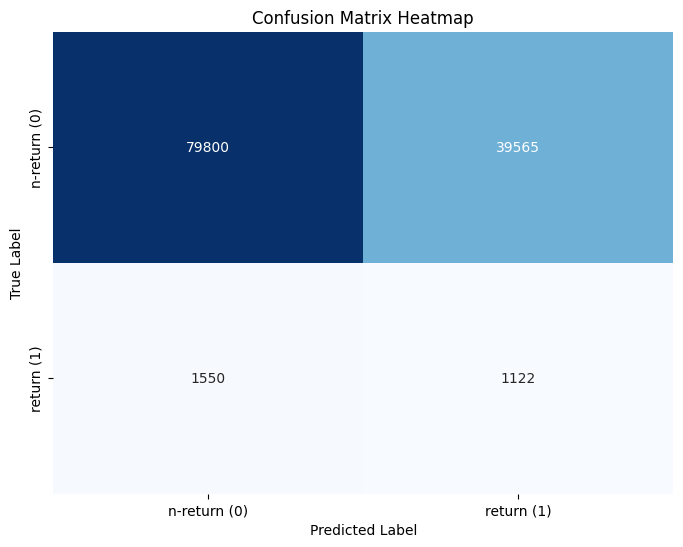

In [49]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

class_names = ['n-return (0)', 'return (1)']

# --- ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [37]:
report_rf = classification_report(Y_test, Y_pred_rf, zero_division=0)

print("\n" + "="*50)
print("### 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (IsReturn=1) ###")
print("-" * 50)
print(report_rf)

# Ï£ºÏöî ÏßÄÌëú Ï∂îÏ∂ú (Î∞òÌíà ÌÅ¥ÎûòÏä§, Ï¶â '1'Ïóê Ï¥àÏ†ê)
precision_rf = precision_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
recall_rf = recall_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
f1_rf = f1_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)

print(f" Î∞òÌíà Ï†ïÎ∞ÄÎèÑ (Precision): {precision_rf:.4f}")
print(f" Î∞òÌíà Ïû¨ÌòÑÏú® (Recall): {recall_rf:.4f}")
print(f" Î∞òÌíà F1-Score: {f1_rf:.4f}")


### 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (IsReturn=1) ###
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    119365
           1       0.03      0.42      0.05      2672

    accuracy                           0.66    122037
   macro avg       0.50      0.54      0.42    122037
weighted avg       0.96      0.66      0.78    122037

 Î∞òÌíà Ï†ïÎ∞ÄÎèÑ (Precision): 0.0276
 Î∞òÌíà Ïû¨ÌòÑÏú® (Recall): 0.4199
 Î∞òÌíà F1-Score: 0.0518


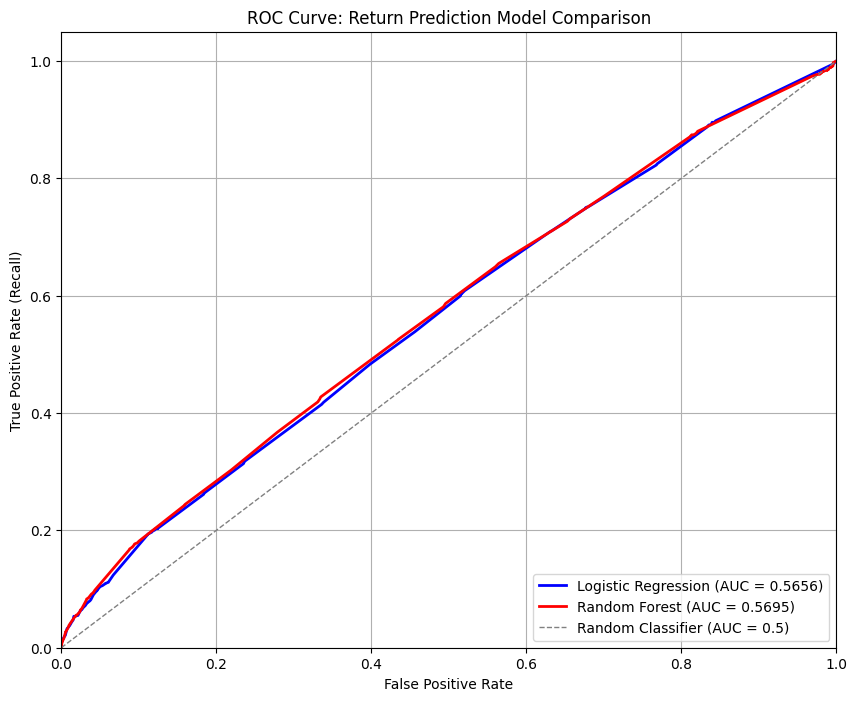

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.figure(figsize=(10, 8))

# --- 1. Logistic Regression Model ROC Curve and AUC Calculation ---
# Y_pred_proba: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†
# Y_test: Ïã§Ï†ú Î†àÏù¥Î∏î

fpr_logit, tpr_logit, thresholds_logit = roc_curve(Y_test, Y_pred_proba)
auc_logit = auc(fpr_logit, tpr_logit)

# ROC Curve plotting (Logistic Regression)
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {auc_logit:.4f})')

# --- 2. Random Forest Model ROC Curve and AUC Calculation ---
# Y_pred_proba_rf: ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†
Y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve plotting (Random Forest)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2,
         label=f'Random Forest (AUC = {auc_rf:.4f})')


# ---  Graph Settings  ---
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1,
         label='Random Classifier (AUC = 0.5)') # ÎûúÎç§ Î∂ÑÎ•òÍ∏∞ ÏÑ†

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') # Í±∞Ïßì ÏñëÏÑ±Î•†
plt.ylabel('True Positive Rate (Recall)') # Ï∞∏ ÏñëÏÑ±Î•† (Ïû¨ÌòÑÏú®)
plt.title('ROC Curve: Return Prediction Model Comparison') # ROC Í≥°ÏÑ†: Î∞òÌíà ÏòàÏ∏° Î™®Îç∏ ÎπÑÍµê
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [39]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# --- 0. ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Ï†ïÏùòÎêú Y_test, Y_pred, Y_pred_rf Î≥ÄÏàò ÏÇ¨Ïö© Í∞ÄÏ†ï) ---

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÄÌëú
acc_logit = accuracy_score(Y_test, Y_pred)
recall_logit = recall_score(Y_test, Y_pred, pos_label=1, zero_division=0)
f1_logit = f1_score(Y_test, Y_pred, pos_label=1, zero_division=0)
auc_logit = roc_auc_score(Y_test, Y_pred_proba) # Y_pred_probaÎäî ÌôïÎ•†Í∞í

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏßÄÌëú
acc_rf = accuracy_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
f1_rf = f1_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
# Y_pred_proba_rfÎäî Ïù¥Ï†ÑÏóê rf_model.predict_proba(X_test)[:, 1]Î°ú Í≥ÑÏÇ∞Îê®
Y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(Y_test, Y_pred_proba_rf)

# --- 1. Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± ---
data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_logit, acc_rf],
    "Recall": [recall_logit, recall_rf],
    "F1-Score": [f1_logit, f1_rf],
    "ROC-AUC": [auc_logit, auc_rf]
}
result_df = pd.DataFrame(data)

# --- 2. ÏÑ±Îä• Îì±Í∏â ÏûêÎèô ÌÉúÍ∑∏ Ìï®Ïàò ---
def performance_tag(value):
    if value >= 0.9:
        return "üü¢ Excellent"
    elif value >= 0.8:
        return "üü° Good"
    else:
        return "üî¥ Fair"

# --- 3. Îì±Í∏â Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Ïä§ÌÉÄÏùºÎßÅ ---
df_colored = result_df.copy()
df_colored.columns = [
    "Model",
    "Accuracy\n(Ï†ïÌôïÎèÑ)",
    "Recall\n(Ïû¨ÌòÑÏú®)",
    "F1-Score\n(Ï†ïÎ∞ÄÎèÑ+Ïû¨ÌòÑÏú®\nÏ°∞ÌôîÌèâÍ∑†)",
    "ROC-AUC\n(Î™®Îç∏ Ï†ÑÏ≤¥\nÍµ¨Î∂ÑÎ†•)"
]

# Í∞Å ÏßÄÌëúÎ≥Ñ Îì±Í∏â Í≥ÑÏÇ∞
df_colored["Îì±Í∏â\n(Ï†ïÌôïÎèÑ)"] = df_colored["Accuracy\n(Ï†ïÌôïÎèÑ)"].apply(performance_tag)
df_colored["Îì±Í∏â\n(Ïû¨ÌòÑÏú®)"] = df_colored["Recall\n(Ïû¨ÌòÑÏú®)"].apply(performance_tag)
df_colored["Îì±Í∏â\n(AUC)"] = df_colored["ROC-AUC\n(Î™®Îç∏ Ï†ÑÏ≤¥\nÍµ¨Î∂ÑÎ†•)"].apply(performance_tag)

# Style Ìëú + Caption ÏÑ§Ï†ï
styled = (
    df_colored.style
    .format(subset=["Accuracy\n(Ï†ïÌôïÎèÑ)", "Recall\n(Ïû¨ÌòÑÏú®)", "F1-Score\n(Ï†ïÎ∞ÄÎèÑ+Ïû¨ÌòÑÏú®\nÏ°∞ÌôîÌèâÍ∑†)", "ROC-AUC\n(Î™®Îç∏ Ï†ÑÏ≤¥\nÍµ¨Î∂ÑÎ†•)"], formatter="{:.4f}")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'),
                                     ('white-space', 'pre-line'),
                                     ('background-color', '#222'),
                                     ('color', 'white'),
                                     ('border', '1px solid #555')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                     ('border', '1px solid #555')]}
    ])
    .set_caption(" Î∞òÌíà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è Îì±Í∏â ÌèâÍ∞Ä")
)

display(styled)

# --- 4. ÌèâÍ∞Ä Í∏∞Ï§Ä Ìï¥ÏÑ§ Î∞è ÏöîÏïΩ Í≤∞Î°† ---

print("\n" + "="*50)
print("###  ÏÑ±Îä• ÌèâÍ∞Ä Í∏∞Ï§Ä Ìï¥ÏÑ§")
print("-" * 50)
print(f"- Accuracy (Ï†ïÌôïÎèÑ): Ï†ÑÏ≤¥ Í±∞Îûò Ï§ë Î∞òÌíà/Ï†ïÏÉÅÏùÑ Ï†ïÌôïÌûà Íµ¨Î∂ÑÌïú ÎπÑÏú® (0.9 Ïù¥ÏÉÅÏù¥Î©¥ üü¢ Excellent)")
print(f"- Recall (Ïû¨ÌòÑÏú®): Ïã§Ï†ú Î∞òÌíà Í±∞Îûò Ï§ë Î∞òÌíàÏúºÎ°ú ÌÉêÏßÄÌïú ÎπÑÏú® (0.8 Ïù¥ÏÉÅ üü° Good, 0.9 Ïù¥ÏÉÅ üü¢ Excellent)")
print(f"- F1-Score (Ï†ïÎ∞ÄÎèÑ+Ïû¨ÌòÑÏú® Ï°∞ÌôîÌèâÍ∑†): ÌÉêÏßÄ(Recall)ÏôÄ Ï†ïÎ∞ÄÎèÑ(Precision)Ïùò Í∑†Ìòï ÏßÄÌëú")
print(f"- ROC-AUC (Î™®Îç∏ Ï†ÑÏ≤¥ Íµ¨Î∂ÑÎ†•): Î∞òÌíàÍ≥º Ï†ïÏÉÅ Í±∞ÎûòÎ•º Íµ¨Î∂ÑÌïòÎäî Ï†ÑÏ≤¥ Îä•Î†• (0.8 Ïù¥ÏÉÅ üü° Good, 0.9 Ïù¥ÏÉÅ üü¢ Excellent)")

# ÏöîÏïΩ Í≤∞Î°†
best_auc_model = df_colored.iloc[df_colored["ROC-AUC\n(Î™®Îç∏ Ï†ÑÏ≤¥\nÍµ¨Î∂ÑÎ†•)"].idxmax(), 0]
best_recall_model = df_colored.iloc[df_colored["Recall\n(Ïû¨ÌòÑÏú®)"].idxmax(), 0]

print("\n" + "="*50)
print("###  ÏµúÏ¢Ö Î™®Îç∏ ÎπÑÍµê ÏöîÏïΩ Í≤∞Î°†")
print("-" * 50)

print(f"[ ÏöîÏïΩ Í≤∞Î°† case 1 ] ROC-AUC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏ÏùÄ **{best_auc_model}** ÏûÖÎãàÎã§. (Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨Î∂ÑÎ†• ÏµúÍ≥†)")

print(f"\n[ ÏöîÏïΩ Í≤∞Î°† case 2: Ïã§Î¨¥Ï†Å Í≥†Î†§ ]")
print(f"- ROC-AUC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏: **{best_auc_model}** (Íµ¨Î∂ÑÎ†• ÏµúÍ≥†)")
print(f"- Recall Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏: **{best_recall_model}** (Ïã§Ï†ú Î∞òÌíà ÌÉêÏßÄÏú® ÏµúÍ≥†)")
print(f"\n Î∞òÌíà ÏòàÏ∏°ÏóêÏÑúÎäî **Ïã§Ï†ú Î∞òÌíàÏùÑ ÎÜìÏπòÏßÄ ÏïäÎäî Í≤É(ÎÜíÏùÄ Recall)**Ïù¥ Ï§ëÏöîÌï©ÎãàÎã§ (Ïû¨Í≥† Î∞è Î¨ºÎ•ò ÎπÑÏö© ÏÜêÏã§ Î∞©ÏßÄ). Îî∞ÎùºÏÑú Ï¢ÖÌï©Ï†ÅÏúºÎ°ú **{best_recall_model}** Î™®Îç∏Ïù¥ Ïã§Ïö©Ï†ÅÏúºÎ°ú Í∞ÄÏû• Ï†ÅÌï©Ìï† Ïàò ÏûàÏäµÎãàÎã§.")
print("="*50)


###  ÏÑ±Îä• ÌèâÍ∞Ä Í∏∞Ï§Ä Ìï¥ÏÑ§
--------------------------------------------------
- Accuracy (Ï†ïÌôïÎèÑ): Ï†ÑÏ≤¥ Í±∞Îûò Ï§ë Î∞òÌíà/Ï†ïÏÉÅÏùÑ Ï†ïÌôïÌûà Íµ¨Î∂ÑÌïú ÎπÑÏú® (0.9 Ïù¥ÏÉÅÏù¥Î©¥ üü¢ Excellent)
- Recall (Ïû¨ÌòÑÏú®): Ïã§Ï†ú Î∞òÌíà Í±∞Îûò Ï§ë Î∞òÌíàÏúºÎ°ú ÌÉêÏßÄÌïú ÎπÑÏú® (0.8 Ïù¥ÏÉÅ üü° Good, 0.9 Ïù¥ÏÉÅ üü¢ Excellent)
- F1-Score (Ï†ïÎ∞ÄÎèÑ+Ïû¨ÌòÑÏú® Ï°∞ÌôîÌèâÍ∑†): ÌÉêÏßÄ(Recall)ÏôÄ Ï†ïÎ∞ÄÎèÑ(Precision)Ïùò Í∑†Ìòï ÏßÄÌëú
- ROC-AUC (Î™®Îç∏ Ï†ÑÏ≤¥ Íµ¨Î∂ÑÎ†•): Î∞òÌíàÍ≥º Ï†ïÏÉÅ Í±∞ÎûòÎ•º Íµ¨Î∂ÑÌïòÎäî Ï†ÑÏ≤¥ Îä•Î†• (0.8 Ïù¥ÏÉÅ üü° Good, 0.9 Ïù¥ÏÉÅ üü¢ Excellent)

###  ÏµúÏ¢Ö Î™®Îç∏ ÎπÑÍµê ÏöîÏïΩ Í≤∞Î°†
--------------------------------------------------
[ ÏöîÏïΩ Í≤∞Î°† case 1 ] ROC-AUC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏ÏùÄ **Random Forest** ÏûÖÎãàÎã§. (Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨Î∂ÑÎ†• ÏµúÍ≥†)

[ ÏöîÏïΩ Í≤∞Î°† case 2: Ïã§Î¨¥Ï†Å Í≥†Î†§ ]
- ROC-AUC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏: **Random Forest** (Íµ¨Î∂ÑÎ†• ÏµúÍ≥†)
- Recall Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏: **Random Forest** (Ïã§Ï†ú Î∞òÌíà ÌÉêÏßÄÏú® ÏµúÍ≥†)

 Î∞òÌíà ÏòàÏ∏°ÏóêÏ

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä : ÏÑ†ÌòïÎ™®Îç∏Ïù¥ÎØÄÎ°ú ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏßÅÏÑ†Ï†ÅÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï®. ÌòÑÏã§ ÏÑ∏Í≥ÑÏùò Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞ Ìå®ÌÑ¥ÏùÑ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÏÑ§Î™ÖÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ.

ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ : ÏïôÏÉÅÎ∏î Î∞è ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù¥ÎØÄÎ°ú Ïó¨Îü¨ Í∞úÏùò ÏùòÏÇ¨Í≤∞Ï†ï Ìä∏Î¶¨Î•º Ï°∞Ìï©Ìï¥ÏÑú Î≥µÏû°Ìïú Í≥°ÏÑ†, ÎπÑÏÑ†ÌòïÏ†Å ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÏûêÎèôÏúºÎ°ú ÌïôÏäµÌï®. Î≥µÌï©Ï†ÅÏù∏ Ï°∞Í±¥ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏°Ìï®.

Ïù¥Ïóê Îî∞ÎùºÏÑú Î∞òÌíà Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÄ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ Ïã¨ÌïòÍ≥† Í∑πÎã®Ï†ÅÏù∏ Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎØÄÎ°ú Ïù¥ÏÉÅÏπòÏóê Îçú ÎØºÍ∞êÌïú ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Î•º ÏÇ¨Ïö©Ìï®Ïù¥ Ï¢ãÏùå.

In [50]:
# ÎßåÏïΩ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Îçî ÎÜíÏù¥Î†§Î©¥?

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, roc_auc_score, f1_score

# 1. Ï¥àÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌÅ¥Î¶¨Îãù Î∞è ÌîºÏ≤ò ÏÉùÏÑ±

df_logi = df.copy()

# 1-1. IsReturn ÌîºÏ≤ò ÏÉùÏÑ± (QuantityÍ∞Ä ÏùåÏàòÏù¥Î©¥ Î∞òÌíà=1)
df_logi['IsReturn'] = (df_logi['Quantity'] < 0).astype(int)

# 1-2. QuantityÎ•º ÏñëÏàòÎ°ú ÌÜµÏùº
df_logi['Quantity'] = df_logi['Quantity'].abs()

# 1-3. Ïù¥ÏÉÅÏπò/Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (UnitPrice > 0)
df_logi = df_logi[df_logi['UnitPrice'] > 0].dropna()

# 1-4. Country Í∑∏Î£πÌïë Î∞è Î≤îÏ£ºÌòï Î≥ÄÏàò ÏÑ§Ï†ï
top_5_countries = df_logi['Country'].value_counts().nlargest(5).index
df_logi['Country_Processed'] = df_logi['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)
df_logi['DayOfWeek'] = df_logi['DayOfWeek'].astype('category')
df_logi['InvoiceMonth'] = df_logi['InvoiceMonth'].astype('category')


# ====================================================================
# 2. ÏÑ±Îä• Í∞úÏÑ†ÏùÑ ÏúÑÌïú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ (Î°úÍ∑∏ Î≥ÄÌôò & ÏÉÅÌò∏ÏûëÏö©)
# ====================================================================

# 2-1. Î°úÍ∑∏ Î≥ÄÌôò (Ïù¥ÏÉÅÏπò Î∞è ÎπÑÏÑ†ÌòïÏÑ± Ìï¥Í≤∞)
# np.log1p(x) = log(1+x), 0 Ïù¥ÏÉÅÏùò Í∞íÏóê ÎåÄÌï¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò
df_logi['Log_UnitPrice'] = np.log1p(df_logi['UnitPrice'])
df_logi['Log_Quantity'] = np.log1p(df_logi['Quantity'])

# 2-2. ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ï∂îÍ∞Ä (ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ìè¨Ï∞©)
df_logi['Price_Qty_Interaction'] = df_logi['Log_UnitPrice'] * df_logi['Log_Quantity']


# ====================================================================
# 3. Î™®Îç∏ÎßÅ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ± Î∞è Î∂ÑÌï†
# ====================================================================

# 3-1. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ± Ï†Ñ Ïù∏Îç±Ïä§ ÌÜµÏùº
df_logi = df_logi.reset_index(drop=True) # Ï†ÑÏ≤¥ dfÏùò Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî

# ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ± (df_logiÏùò Ïù∏Îç±Ïä§Î•º Îî∞Î¶Ñ)
X_dummies = pd.get_dummies(
    df_logi[['Country_Processed', 'InvoiceMonth']],
    drop_first=True
)
# X_dummiesÎèÑ Ïù∏Îç±Ïä§Î•º Ï¥àÍ∏∞Ìôî (ÏïàÏ†ïÏÑ± ÌôïÎ≥¥)
X_dummies = X_dummies.reset_index(drop=True).astype(int)

# ÎèÖÎ¶ΩÎ≥ÄÏàò X_new Íµ¨ÏÑ± (Index ÌÜµÏùºÎêòÏóàÏúºÎØÄÎ°ú ÏïàÏ†ÑÌïòÍ≤å concat)
X_new = pd.concat([
    df_logi[['Log_UnitPrice', 'Log_Quantity', 'Price_Qty_Interaction']],
    X_dummies
], axis=1)

Y_new = df_logi['IsReturn']

# 3-2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (Train: 70%, Test: 30%)
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(
    X_new, Y_new, test_size=0.3, random_state=42, stratify=Y_new # stratify=YÎ•º ÌÜµÌï¥ Î∞òÌíà ÎπÑÏú® Ïú†ÏßÄ
)

# 3-3. Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌëúÏ§ÄÌôî
scaler_new = StandardScaler()
cont_cols = ['Log_UnitPrice', 'Log_Quantity', 'Price_Qty_Interaction']

X_train_new[cont_cols] = scaler_new.fit_transform(X_train_new[cont_cols])
X_test_new[cont_cols] = scaler_new.transform(X_test_new[cont_cols])


# ====================================================================
# 4. Í∞úÏÑ†Îêú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
# ====================================================================

# Î™®Îç∏ ÌïôÏäµ
logit_model_new = sm.Logit(Y_train_new, X_train_new)
result_new = logit_model_new.fit(disp=0)

# ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
Y_pred_proba_new = result_new.predict(X_test_new)

# ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ï (Recall Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ 0.5 ÎåÄÏã† 0.35 ÏÇ¨Ïö©)
optimal_threshold = 0.35
Y_pred_new = (Y_pred_proba_new >= optimal_threshold).astype(int)


# --- Í≤∞Í≥º Ï∂úÎ†• ---
print("\n" + "="*70)
print("###  Í∞úÏÑ†Îêú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ (Î°úÍ∑∏ Î≥ÄÌôò & ÏÉÅÌò∏ÏûëÏö©) Í≤∞Í≥º ###")
print("="*70)
print(result_new.summary().tables[1]) # ÏÉàÎ°úÏö¥ Í≥ÑÏàò ÌÖåÏù¥Î∏î Ï∂úÎ†•

# Ï£ºÏöî ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
recall_new = recall_score(Y_test_new, Y_pred_new, pos_label=1, zero_division=0)
f1_new = f1_score(Y_test_new, Y_pred_new, pos_label=1, zero_division=0)
auc_new = roc_auc_score(Y_test_new, Y_pred_proba_new)

print("-" * 70)
print(f" Í∞úÏÑ†Îêú Î™®Îç∏Ïùò ROC-AUC (Î™®Îç∏ Ï†ÑÎ∞òÏ†Å Íµ¨Î∂ÑÎ†•): {auc_new:.4f}")
print(f" ÏÇ¨Ïö©Îêú ÏûÑÍ≥ÑÍ∞í (Threshold): {optimal_threshold} (Recall Í∞úÏÑ† Î™©Ï†Å)")
print(f" Í∞úÏÑ†Îêú Î™®Îç∏Ïùò Ïû¨ÌòÑÏú® (Recall): {recall_new:.4f}")
print(f" Í∞úÏÑ†Îêú Î™®Îç∏Ïùò F1-Score: {f1_new:.4f}")
print("="*70)


###  Í∞úÏÑ†Îêú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ (Î°úÍ∑∏ Î≥ÄÌôò & ÏÉÅÌò∏ÏûëÏö©) Í≤∞Í≥º ###
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Log_UnitPrice                        0.4309      0.020     22.084      0.000       0.393       0.469
Log_Quantity                        -0.1664      0.027     -6.091      0.000      -0.220      -0.113
Price_Qty_Interaction               -0.4175      0.028    -14.903      0.000      -0.472      -0.363
Country_Processed_France            -2.7593      0.105    -26.336      0.000      -2.965      -2.554
Country_Processed_Germany           -1.7935      0.064    -28.091      0.000      -1.919      -1.668
Country_Processed_Other             -2.0957      0.060    -35.090      0.000      -2.213      -1.979
Country_Processed_Spain             -3.0161      0.177    -17.061      0.000      -3.363      -2.670
Countr

recall Í∞íÏù¥ 0.0037ÏóêÏÑú 0.0079Î°ú ÏïΩ 2Î∞∞Ï†ïÎèÑ ÎÜíÏïÑÏßê.